In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
import warnings


/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/credit_fraud/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print("正样本比例：",data['Class'].value_counts()[1]/data.shape[0])

正样本比例： 0.001727485630620034


In [10]:
data.Time[data.Class == 1]

541          406.0
623          472.0
4920        4462.0
6108        6986.0
6329        7519.0
            ...   
279863    169142.0
280143    169347.0
280149    169351.0
281144    169966.0
281674    170348.0
Name: Time, Length: 492, dtype: float64

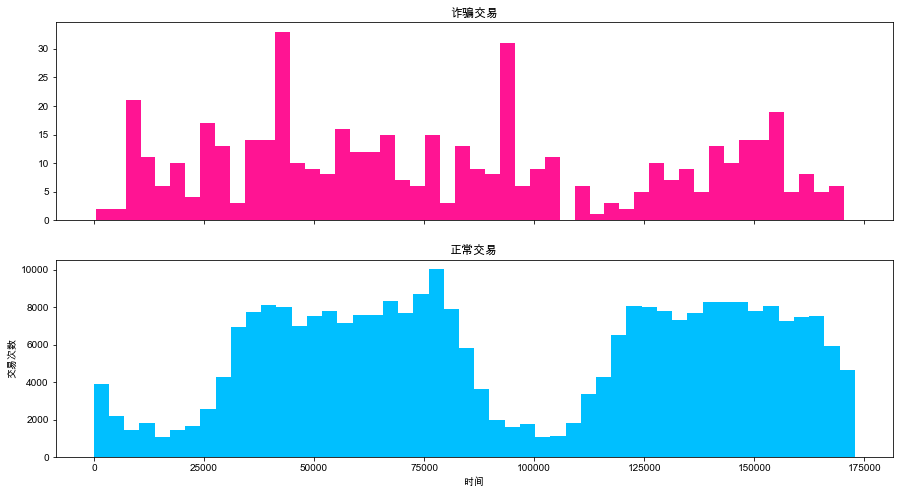

In [11]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # mac 设置别的字体格式
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50
ax1.hist(data.Time[data.Class == 1], bins = bins, color = 'deeppink')
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

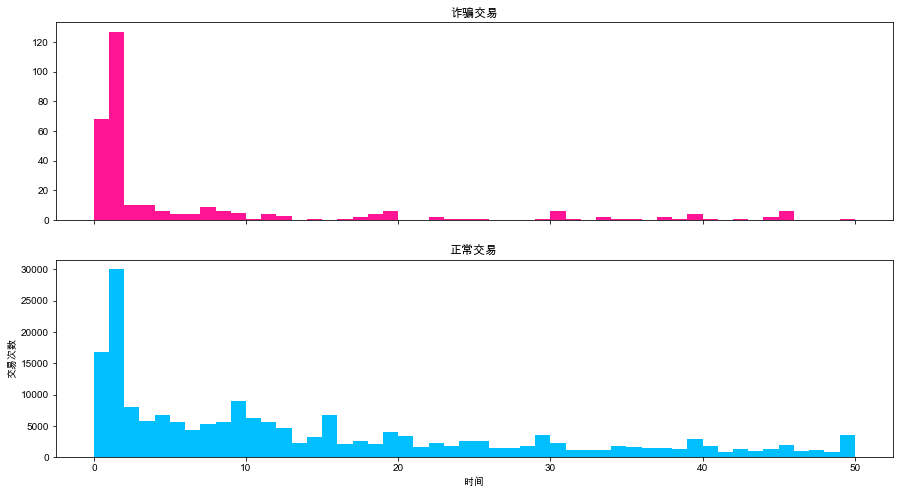

In [16]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # mac 设置别的字体格式
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50
ax1.hist(data.Amount[data.Class == 1], bins = bins, color = 'deeppink',range=(0,50))
ax1.set_title('诈骗交易')
ax2.hist(data.Amount[data.Class == 0], bins = bins, color = 'deepskyblue',range=(0,50))
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

In [20]:
data['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [21]:
data['Amount_Norm']=preprocessing.StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249


In [22]:
X = data.drop(['Time','Amount','Class'],axis=1)
y = data['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
clf = LogisticRegression()

In [28]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pre_pro = clf.predict_proba(X_test)
print("混淆矩阵：")
print(metrics.confusion_matrix(y_test,y_pred))
print("模型效果：")
print(metrics.classification_report(y_test,y_pred))

混淆矩阵：
[[93825    13]
 [   55    94]]
模型效果：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.88      0.63      0.73       149

    accuracy                           1.00     93987
   macro avg       0.94      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987



In [26]:
# 模型的特征的权重参数
clf.coef_

array([[ 0.07375635, -0.00262273,  0.01776935,  0.61594451,  0.08054898,
        -0.09712384, -0.13293689, -0.16869414, -0.2067082 , -0.58133785,
        -0.04575045, -0.05447759, -0.24489725, -0.59307046, -0.07835101,
        -0.24217199,  0.01781632, -0.03587757, -0.01412963, -0.39422724,
         0.31604441,  0.52415951, -0.08607208,  0.1087243 , -0.09533273,
         0.08196859, -0.75820322, -0.39480012,  0.21519185]])

In [27]:
# 模型的截距
clf.intercept_

array([-8.32313093])

In [30]:
# 模型给出的正负样本的可能性
y_pre_pro

array([[5.29928933e-08, 9.99999947e-01],
       [9.99908235e-01, 9.17653018e-05],
       [9.99944806e-01, 5.51938980e-05],
       ...,
       [9.99944337e-01, 5.56626585e-05],
       [9.99925627e-01, 7.43725671e-05],
       [9.99875139e-01, 1.24861006e-04]])

In [34]:
y_pre_pro.shape

(93987, 2)

In [33]:
y_score = clf.decision_function(X_test)
y_score.shape

(93987,)

In [38]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_pre_pro[:,1])


In [42]:
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_test,y_score)

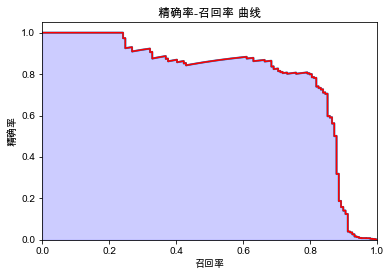

In [43]:
plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post') 
plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b') 
plt.plot(recall, precision, linewidth=2) 
# plt.plot(recall2,precision2,color ='red') # 两条线重合，说明，y_score,和y_pred_pro，本质是一回事
plt.xlim([0.0,1]) 
plt.ylim([0.0,1.05]) 
plt.xlabel('召回率') 
plt.ylabel('精确率') 
plt.title('精确率-召回率 曲线') 
plt.show();

### auc曲线的绘制

In [46]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pre_pro[:,1])
print(fpr,tpr,threshold)

[0.         0.         0.         ... 0.99940323 0.99942454 1.        ] [0.         0.00671141 0.19463087 ... 1.         1.         1.        ] [2.00000000e+00 1.00000000e+00 9.99999542e-01 ... 1.81829385e-09
 1.80889348e-09 1.70073694e-11]


In [47]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.979532482869592

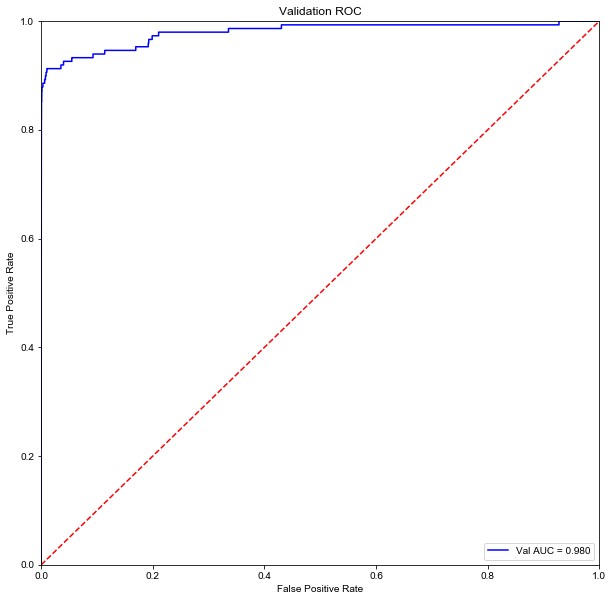

In [50]:
plt.figure(figsize=(10,10))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()